# Volatility Modelling

We can capture the volatility clustering characteristic of financial asset returns by using the GARCH-Family approach to cature the varying nature of volatility. 

Using this approach, the conditional variance given in the past observations is available to us.

<p style = "text-align:center">  $y_t = \rho y_t-1 + \epsilon_t$ </p>

<p style = "text-align:center">  $\epsilon_t = \sigma_t u_t$ </p>

<p style = "text-align:center">  $\sigma_t^2 = \omega + {\sum}_{i=1}^{p}\alpha_i \epsilon^2_{t-i} + \sum_{j = 1}^{q} \beta_j \sigma^2_{t-j}$ </p>

$\epsilon_t:$ is the disturbance term of a conditional mean equation (usually an ARMA process)

$u_t \sim \text{i.i.d}(0,d)$

**ARCH Effects:**

${\sum}_{i=1}^{p}\alpha_i \epsilon^2_{t-i}$

**GARCH Effects:**

$\sum_{j = 1}^{q} \beta_j \sigma^2_{t-j}$

The **conditional volatility** process is determined linearly by its own lagged values $\sigma^2_{t-j}$ and the lagged squared observations (the values of $\epsilon_t$)

### GARCH(1,1)

In empirical studies, GARCH(1,1) usually provides an appropriate fit to the data. 

<p style = "text-align:center">  $\sigma_t^2 = \omega + \alpha_1 \epsilon^2_{t-1} + \beta_1\sigma^2_{t-1}$ </p>

$ \text{Conditional Variance} =
    \begin{cases}
      \frac{\omega}{1-\alpha-\beta} & \text{weighted average of the long-run variance}\\
      \sigma^2_{t-1} & \text{the last predicted variance}\\
      \epsilon^2_{t-1} & \text{the new information }
    \end{cases}$
    
**GARCH(1,1):** Captures autoregression in volatility (volatility clustering) and leptokurtic \asset return distributions, however, it is symmetric and cannot capture asymmetries in distributions and leverage effects.

### Emergence of Volatility Clustering:

A large positive (negative) shock in $u_t$ increases (decreases) the value of $\epsilon_t$ which in turn increases (decreases) the value of $\sigma_{t+1}$, resulting in a larger (smaller) value for $\epsilon_{t+1}$. Therefore, the shock is persistent.

**a. A large positive shock in $u_t$:** $\uparrow$ $\epsilon_t$ : $\uparrow$ $\sigma_{t+1}$ : $\uparrow$ $\epsilon_{t+_1}$

**b. A large negative shock in $u_t$:** $\downarrow$ $\epsilon_t$ : $\downarrow$ $\sigma_{t+1}$ : $\downarrow$ $\epsilon_{t+_1}$

# Practical Example

Analysis of the return series of the daily closing prices of Apple Inc. based on the period Jan 01, 2006 to March 31, 2014

## Procedure

*Fitting, filtering, forecasting and simulating*

**1. Exploratory Analysis:**

- Persistence in square returns (ACF, PACF)

- Leptokurtic distribution (plot distribution vs Gaussian distribution)

**2. Fit the Data with a GARCH(p,q) Model:**

- Specify the model

- Fit the model to the data by estimating the unkown parameters using MLE

**3. Analyse the News Impact Curves for Volatility Asymmetries and Leverage Effects:**

- The news impact curve is a good measure to see if a particular process requires an additional extension to its model to capture the leverage effects

- Goal is to estimate GARCH-Family extensions and analyse the resulting news impact curve

- a. EGARCH Models: Capture asymmmetries in a log conditional variance model with using absolute value terms to account for the asymmetry in response to shocks in the conditional variance (posive vs negative)

- b. T-GARCH Models: if a certain threshold is met, namely $\epsilon_{t-1} < 0$ then the indicator funtion will be positive and increase the effect of negative shocks according to the leverage effect

**4. Forecast:**

Choose the best model and:

- Specify the parameters

- Simulate 

- Fit the parameters to the model

- Forecast the fitted model with n out of sample periods


## 1. Exploratory Analysis

### Analyse the Persistence in the ACF and PACF

[1] "AAPL"

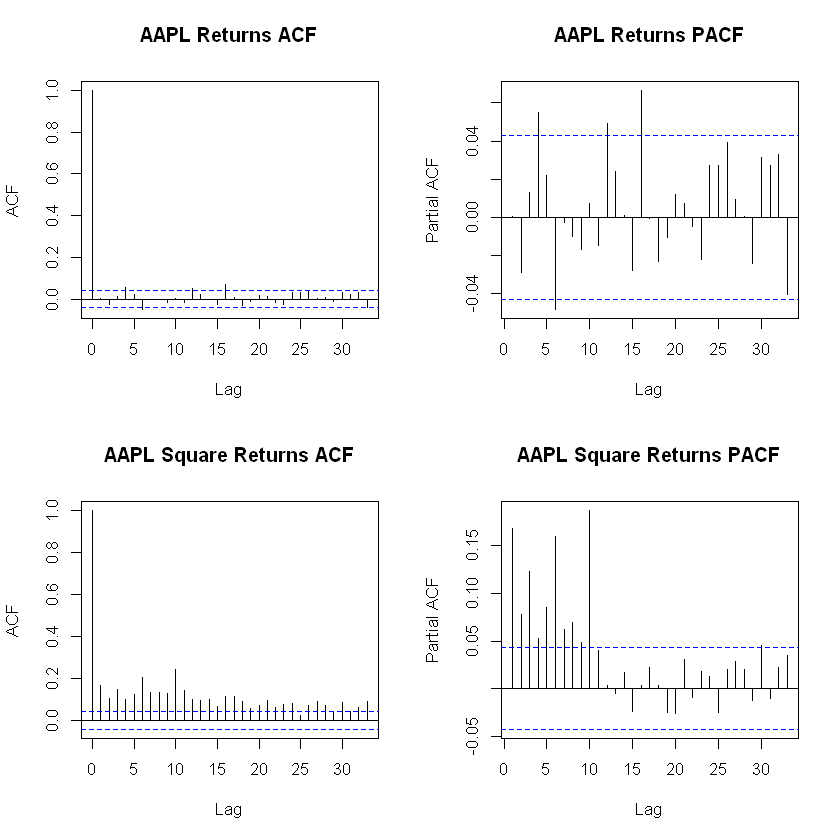

In [3]:
library(quantmod)
library(rugarch)

# Load Apple data and calculate log-returns

getSymbols("AAPL", from = "2006-01-01", to = "2014-03-31")
ret.aapl <- dailyReturn(Cl(AAPL), type = "log")

par(mfrow=c(2,2))
acf(ret.aapl, main = "AAPL Returns ACF")
pacf(ret.aapl, main = "AAPL Returns PACF")
acf(ret.aapl^2, main = "AAPL Square Returns ACF")
pacf(ret.aapl^2, main = "AAPL Square Returns PACF")

There is a clear sign of persistence in the square returns of AAPL with an ACF which has over 30 significant lags.

### Analyse the Normality Assumption

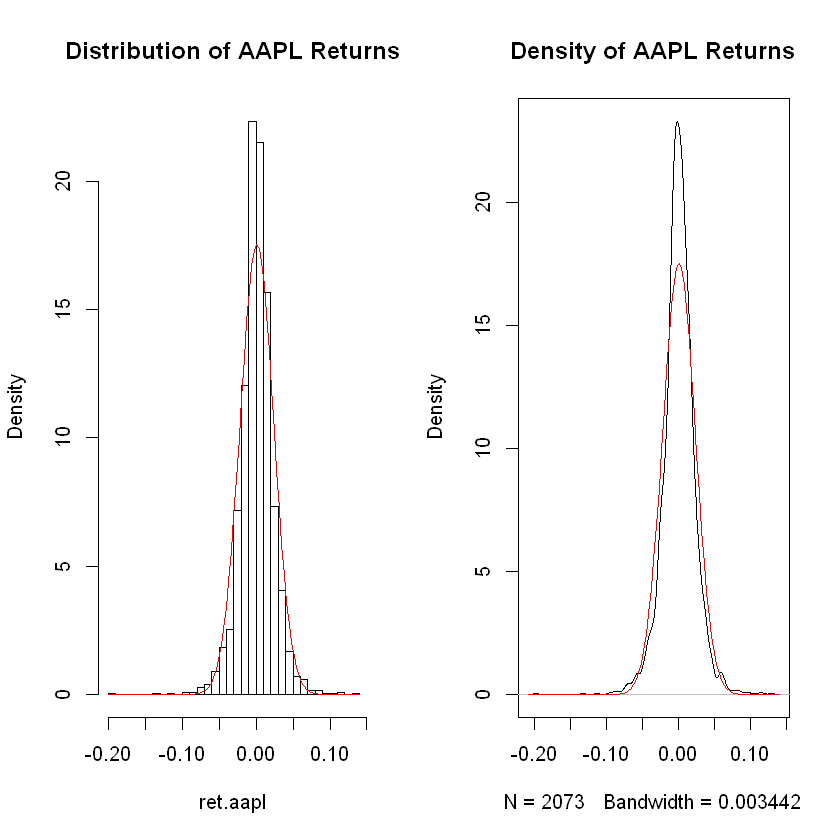

In [4]:
## define mean and sfgd

m = mean(ret.aapl)
s = sd(ret.aapl)

par(mfrow=c(1,2))

# construct distribution
hist(ret.aapl, nclass = 40, freq = FALSE, main = "Distribution of AAPL Returns")
curve(dnorm(x, mean = m, sd = s), add=TRUE, col = "red")

# construct density
plot(density(ret.aapl), main = "Density of AAPL Returns")
curve(dnorm(x, mean = m, sd = s), add=TRUE, col = "red")

A we can see, AAPL returns display leptokurtic features and have fat tails.

### Conclusion

AAPL returns display **persistence** in high lags and are **leptokurtic** features. These combined are an excellent basis for using the GARCH family of volatility models.

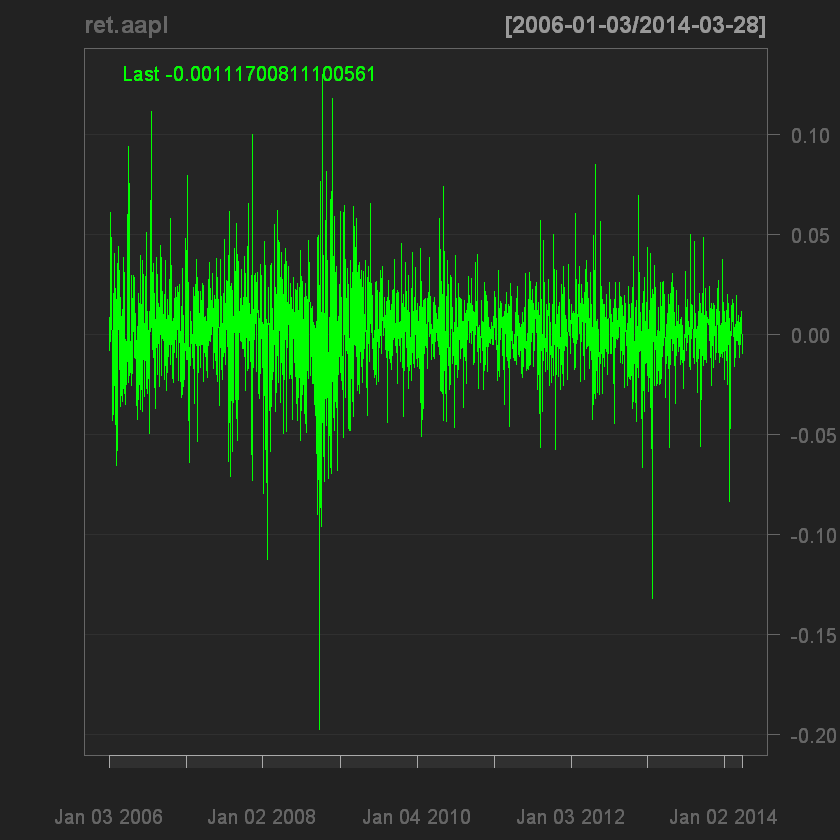

In [21]:
chartSeries(ret.aapl)

## 2. Fitting the Data with GARCH Models

### Fitting a sGARCH(1,1) Model

Conidtional mean equation only has one constant $\mu$.

In [4]:
# Specify Model
garch11.spec <- ugarchspec(variance.model = list(model="sGARCH", garchOrder = c(1,1)),
                          mean.model = list(armaOrder = c(0,0)))

# Fit model by estimating the unkown parameters by MLE

aapl.garch11.fit <- ugarchfit(spec=garch11.spec, data = ret.aapl)

coef(aapl.garch11.fit)

mu        omega       alpha1        beta1 
1.925635e-03 1.035124e-05 8.175766e-02 8.986993e-01

Standard GARCH models are able to capture fat tails and volatility clustering but to explain asymmetries caused by the leverage effect we need more advanced models.

## 3. News Impact Curves and Leverage Effects Models

**Accounting for Volatility Asymmetries:** 

Are useful tools to visualise the magnitude of volatility changes in response to shocks, i.e. shock as news influencing the market movements.

-They plot the **change in conditional volatility** against shocks in different sizes, and can concisely express the asymmetric effects in volatility

- The news impact curve is a good measure to see if a particular process requires an additional extension to its model to capture the leverage effects

- Goal is to estimate GARCH-Family extensions and analyse the resulting news impact curve

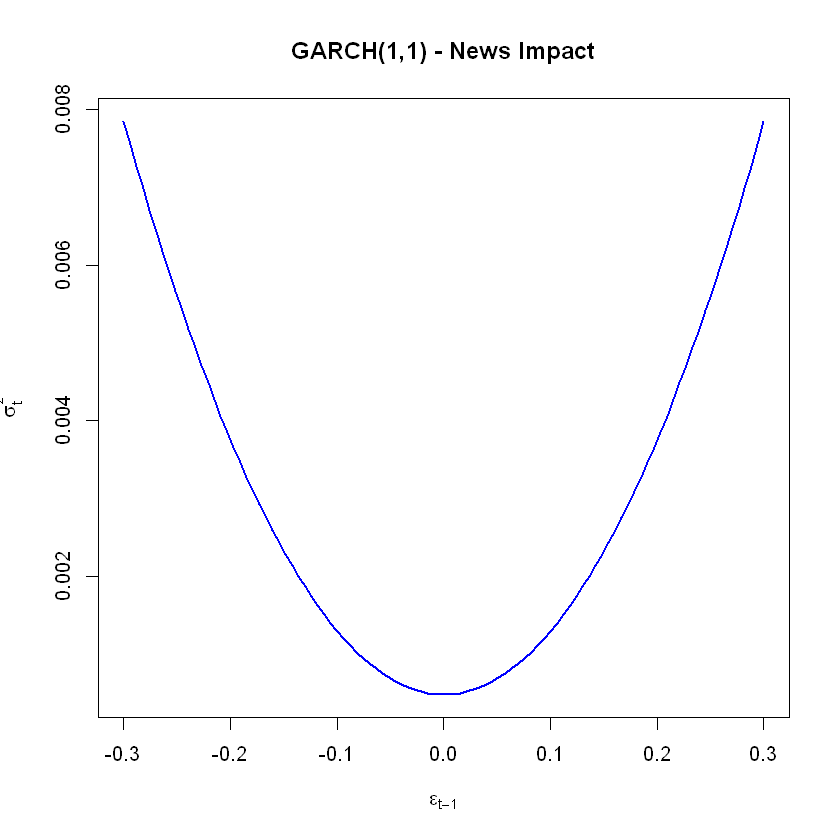

In [9]:
# calculate the news impact numerically for the previously defined GARCH(1,1)  
ni.garch11 <- newsimpact(aapl.garch11.fit)

# Plot the news impact on AAPL stock
plot(ni.garch11$zx, ni.garch11$zy, type = "l", lwd=2, col = "blue", main = "GARCH(1,1) - News Impact",
    ylab = ni.garch11$yexpr, xlab = ni.garch11$xexpr)

As we can see and expected, no asymmetries are present in response to positive and negative shock using the GARCH(1,1) models, therefore, we turn to models that incorporate these effects.

### a. The Exponential GARCH Model (EGARCH)

This approach directly models the logaritm of the conditional volatility.

<p style = "text-align:center"> $\epsilon_t = \sigma u_t$ </p>

<p style = "text-align:center"> $log(\sigma^2_t) = \omega + \sum_{i = 1}^p (\alpha_i u_{t-i} + \gamma (|u_{t-i}|- E|u_{t-i}|)) + \sum_{j = 1}^q \beta_j log(\sigma^2_{t-j})$ </p>

The model formulation allows multiplicative dynamics in evolving the volatility process.

Asymmetry is captures by the $\alpha_i$ parameter:
- A **negative** value indicates that the process reacts more to negative shocks, as observable in read data sets

### Fitting the EGARCH

To fit an EGARCH Model, the only parameter to be changed in a model specification is to set the EGARCH model type. *by running the fitting function, the additional parameter will be estimated*

In [10]:
# Specify EGARCH(1,1) model with only a constant in the mean equation

egarch11.spec <- ugarchspec(variance.model = list(model = "eGARCH", garchOrder = c(1,1)),
                            mean.model = list(armaOrder = c(0,0)))

aapl.egarch11.fit <- ugarchfit(spec = egarch11.spec, data = ret.aapl)
coef(aapl.egarch11.fit)

mu       omega      alpha1       beta1      gamma1 
 0.00145036 -0.29245045 -0.09307557  0.96181574  0.17643603

### Analyzing the News Impact Curve

News impact curve reflects the strong asymmetry in response of conditional volatility to shocks and confirms the necessity of asymmetric models.

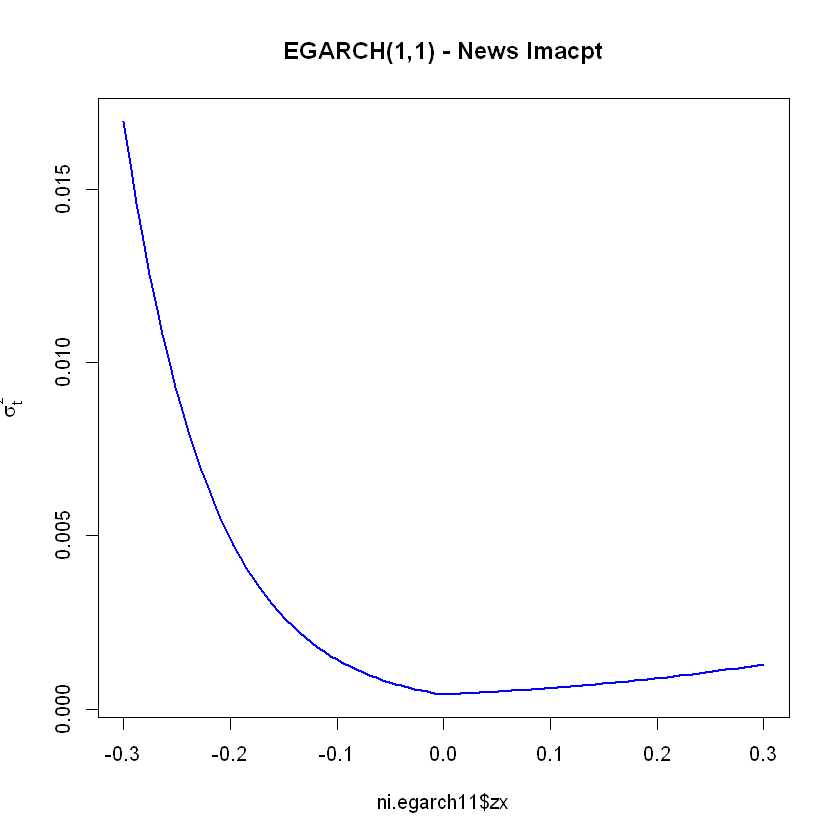

In [11]:
ni.egarch11 <- newsimpact(aapl.egarch11.fit)

plot(ni.egarch11$zx, ni.egarch11$zy, type = "l", lwd = 2, col = "blue", 
    main = "EGARCH(1,1) - News Imacpt", ylab = ni.egarch11$yexpr, xlab = ni.egarch11$xepr)

### b. The Threshold GARCH Model (T-GARCH)

The TGARCH specification involves an explicit distinction of model parameters above and below a certain threshold. The TGARCH is also a sub-model of *asymmetric power ARCH class* of models.

<p style = "text-align:center"> $ \epsilon_t = \sigma_t u_t$ </p> 

<p style = "text-align:center"> $ \sigma_t^2 = \omega + \sum_{i = 1}^p (\alpha_i + \gamma I_{t-i})\epsilon^2_{t-i} + \sum_{j = 1}^q \beta_j \sigma_{t-j}^2$ </p>

$I_{t-i} = \begin{cases} 1 & \text{if} \epsilon_{t-1} < 0 \\ 0 & \text{if} \epsilon_{t-1} \geq 0 \end{cases}$

**The ARCH coefficient** depends on the sign of the previous error terms. If $\gamma_1$ is positive then a negative error term will have a higher impact on conditional volatility incorporating the leverage effect in the model.

- Basiclally if a certain threshold is met, namely $\epsilon_{t-1} < 0$ then the indicator funtion will be positive and increase the effect of negative shocks according to the leverage effect

In [5]:
# Specify TGARCH(1,1) model with only constant in mean equation

tgarch11.spec <- ugarchspec(variance.model = list(model = "fGARCH", submodel = "TGARCH",
                                                  garchOrder=c(1,1)), 
                           mean.model = list(armaOrder = c(0,0)))
# Fit the model

aapl.tgarch11.fit <- ugarchfit(spec = tgarch11.spec, data = ret.aapl)

# get coef

coef(aapl.tgarch11.fit)

mu        omega       alpha1        beta1        eta11 
0.0014498472 0.0008969004 0.0999218993 0.8804773595 0.5797124284

Now we can analyse the news impact curve. Thanks to the specific functional form, the curve for a T-GARCH is less flexible in representing different responses as there is a kink at the zero-point:

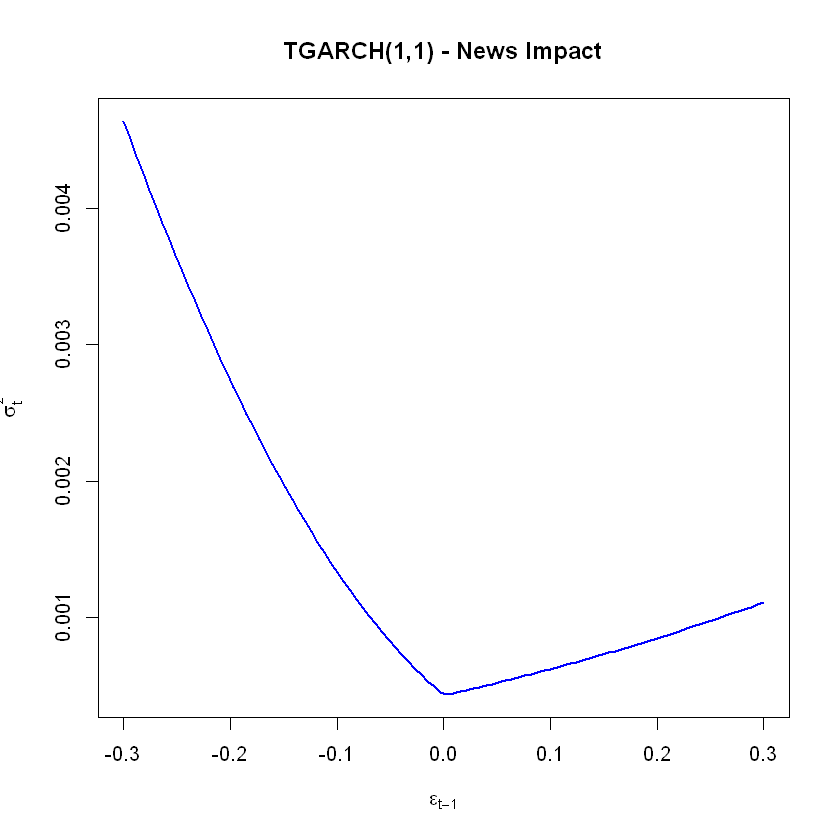

In [7]:
ni.tgarch11 <- newsimpact(aapl.tgarch11.fit)
plot(ni.tgarch11$zx, ni.tgarch11$zy, main = "TGARCH(1,1) - News Impact", xlab = ni.tgarch11$xexpr,
    ylab = ni.tgarch11$yexpr, col = "blue", type = "l", lwd = 2)

## Simulation and Forecasting

After specifying the model, we can simulate a time series with a given conditional mean and GARCH specification by specifying also some fixed parameters.

In [23]:
garch11.spec <- ugarchspec(variance.model = list(garchOrder = c(1,1)),
                          mean.model = list(armaOrder = c(0,0)),
                          #fixed.pars = list(mu = 0, omega = 0.1, alpha1=0.1, beta1=0.7)
                          )
# Simulation with the following code
#garch11.sim <- ugarchpath(garch11.spec, n.sim=1000)

Once we have estimated the model and a fitted object, forecasting the conditional volatility based on that is as follows.

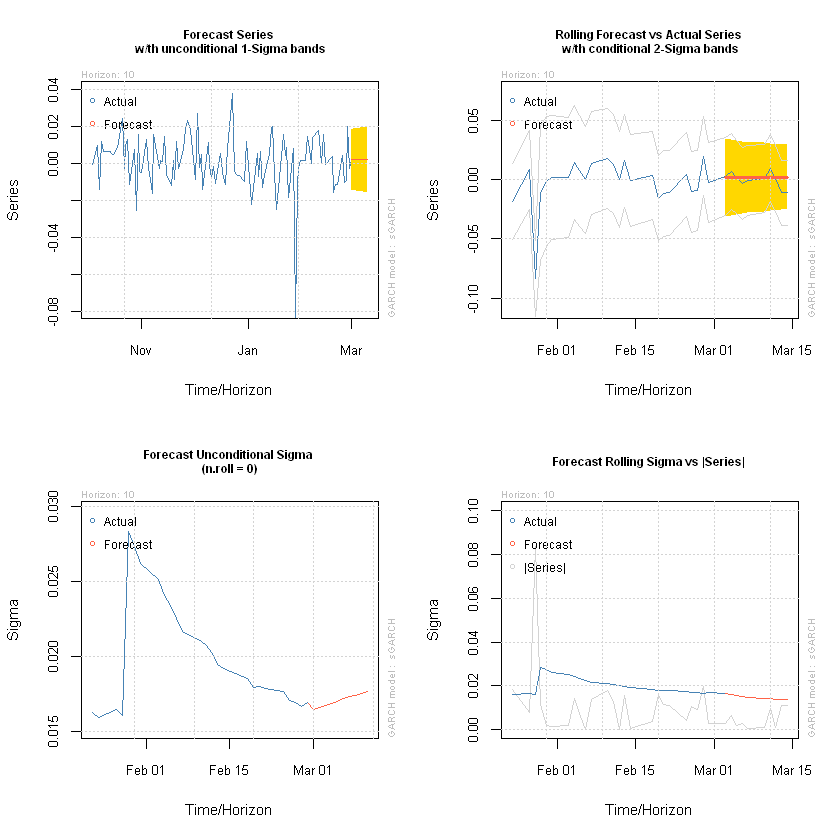

In [24]:
aapl.garch11.fit <- ugarchfit(spec = garch11.spec, data = ret.aapl, out.sample=20)

aapl.garch11.fcst <- ugarchforecast(aapl.garch11.fit, n.ahead = 10, n.roll=10)

## Plotting provides a selection menu to plot either the predicted time series or the 
## the predicted conditional volatility

plot(aapl.garch11.fcst, which = "all")